### Experiments

In [22]:
import numpy as np
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size
y      = np.array([1,   2,   3,    4])
y_hat1 = np.array([1.2, 1.9, 2.9,  4.2]) 
mean_squared_error(y_hat1, y)

0.025000000000000022

In [23]:
y_hat2 = np.array([2.2, 0.9, 2.9,  5.2]) 
mean_squared_error(y_hat2, y)

1.0250000000000004

In [24]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [25]:
y = np.array([0, 1, 0, 0, 0])

In [26]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [27]:
cross_entropy_error(y_hat1, y)

0.3566748010815999

In [28]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [29]:

cross_entropy_error(y_hat2, y)

2.9957302735559908

### Loading Images Test

In [30]:
from mnist_data import MnistData
mnist = MnistData()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [32]:
(train_images, train_labels), (_, _) = mnist.load()

In [33]:
train_size = train_images.shape[0]
batch_size = 32

In [34]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[42844 12746 47492 14420 38117 54256 20394  1405 11481 11444 21665 33985
 18738 58393 52112 28536 47300 47825 17729 20181  4027  2702 14678 11136
 49288 55669 15881 46510 22302 16091  6683 12000]


In [35]:
train_size

60000

In [36]:
# for mini-batch training.
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [37]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [38]:

cross_entropy_error(y_hat_batch, y_batch)

0.8573989640459981

In [39]:

def numerical_diff(f, x):
    h = 10e-50
    return (f(x + h) - f(x))/h

In [40]:
def func(x):
    return x**2 + 0.1*x

In [41]:

numerical_diff(func, 0.8)

0.0

In [42]:
# more reasonable approximation
def numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [44]:
numerical_diff(func, 0.7)

1.4999999999998348

In [45]:

numerical_diff(func, 0.3)

0.6999999999998674

In [46]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [47]:

numerical_diff(func_tmp1, 3.2)

6.400000000006401

In [48]:

def func_tmp2(x1):
    return 3.0**2 + x1**2

In [49]:
numerical_diff(func_tmp2, 4.5)

8.999999999979025

### Numerical Gradient

In [50]:
def func2(x):
    return x[0]**2 + x[1]**2
def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [51]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [52]:

_numerical_diff(func_tmp1, 3.5)

7.000000000019213

In [53]:
_numerical_diff(func_tmp2, 4.5)

8.999999999979025

In [54]:
_numerical_gradient(func2, np.array([3.5, 4.5]))

array([7., 9.])

In [55]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [56]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

In [57]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss

In [58]:
# let's test SimpleNet
net = SimpleNet()
print(net.w)

[[ 0.47497506  0.63851564  0.72884852]
 [-0.3063103  -0.84368323 -1.2840541 ]]


In [59]:
x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)

[0.27428359 0.28666114 0.26622369]


In [60]:
np.argmax(p)

1

In [61]:
y = np.array([0, 1, 0])
net.loss(x, y)

1.0877090088883428

In [62]:
y = np.array([0, 0, 1])
net.loss(x, y)

1.1081464528393872

In [63]:
def loss_function(w):
    return net.loss(x, y)

In [64]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.23298945  0.23589121 -0.46888066]
 [ 0.06323999  0.06402761 -0.12726761]]


In [65]:
# using lamda
loss_function = lambda w: net.loss(x, y)

In [66]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.23298945  0.23589121 -0.46888066]
 [ 0.06323999  0.06402761 -0.12726761]]


### TwoLayerNet Class Testing

In [68]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [69]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [70]:
import activations
import errors
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads

In [73]:
import matplotlib.pyplot as plt
import numpy as np
mnist = MnistData()
(x_train, y_train), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [74]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [75]:
network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [76]:
network.params

{'w1': array([[ 0.00143441,  0.00477416,  0.00622925, ..., -0.00722092,
          0.01323175,  0.00127756],
        [ 0.01635436,  0.00837469, -0.01197808, ...,  0.00232153,
         -0.01008135, -0.02898412],
        [-0.01255774,  0.00486249,  0.01039424, ..., -0.01361148,
         -0.00230276,  0.00297516],
        ...,
        [-0.01071607,  0.01447168,  0.00696201, ..., -0.00287395,
          0.00062885, -0.00383038],
        [ 0.01545768, -0.00958911,  0.02231594, ...,  0.00184225,
          0.00276515,  0.01210025],
        [-0.00425176,  0.00368626,  0.01616197, ...,  0.0147337 ,
          0.00545973,  0.0199155 ]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [77]:
iterations = 10 #10000
train_size = x_train[:100].shape[0]
batch_size = 2 #100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [79]:
train_losses = []
train_accs = []
test_accs = []
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.10218333333333333, 0.101


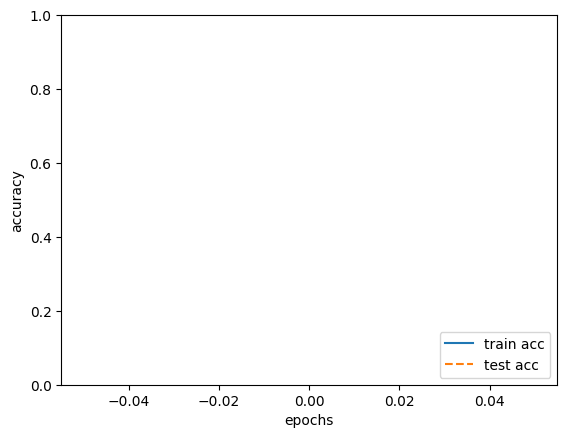

In [80]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Backpropagation

In [81]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None
        self.activations = Activations()

    def forward(self, x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        
        self.x = None
        self.original_x_shape = None

        self.dw = None
        self.db = None

    def forward(self, x):
        # 
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.w) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None 
        self.y_hat = None    
        self.y = None    
        self.activations = Activations()
        self.errors = Errors()
        
    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        #if self.y.size == self.y_hat.size: # one hot encoding
        
        dx = (self.y_hat - self.y) / batch_size
        
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        """
        return dx

### Two Layer Net With Backpropagation

In [83]:
import numpy as np
from activations import Activations
from errors import Errors
from collections import OrderedDict

In [85]:
class TwoLayerNetWithBackProp:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # add layers
        self.layers = OrderedDict()
        self.update_layers()
        self.last_layer = SoftmaxWithLoss()


    def update_layers(self):
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])


    def predict(self, x):
        ## new implementation for backprop
        for layer in self.layers.values():
            x = layer.forward(x)

        y = x
        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        # return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    def gradient(self, x, y):
        self.loss(x, y)

        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
      
        return grads

In [87]:
from mnist_data import MnistData
mnist = MnistData()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [88]:
(x_train, y_train), (x_test, y_test) = mnist.load()
print(x_train.shape)

(60000, 784)


In [93]:
network = None
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [94]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [95]:
train_losses = []
train_accs = []
test_accs = []

In [96]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')
    

train acc, test_acc : 0.15773333333333334, 0.1576
train acc, test_acc : 0.9068166666666667, 0.911
train acc, test_acc : 0.9261666666666667, 0.9286
train acc, test_acc : 0.9387833333333333, 0.9388
train acc, test_acc : 0.9481166666666667, 0.9485
train acc, test_acc : 0.9541833333333334, 0.9528
train acc, test_acc : 0.9602666666666667, 0.9582
train acc, test_acc : 0.9653, 0.9616
train acc, test_acc : 0.9683, 0.9649
train acc, test_acc : 0.9721166666666666, 0.9666
train acc, test_acc : 0.9745166666666667, 0.97
train acc, test_acc : 0.9761166666666666, 0.9698
train acc, test_acc : 0.9787833333333333, 0.9713
train acc, test_acc : 0.9804166666666667, 0.9735
train acc, test_acc : 0.9811333333333333, 0.9739
train acc, test_acc : 0.9829833333333333, 0.9749
train acc, test_acc : 0.9832666666666666, 0.9729


### Accuracy Check

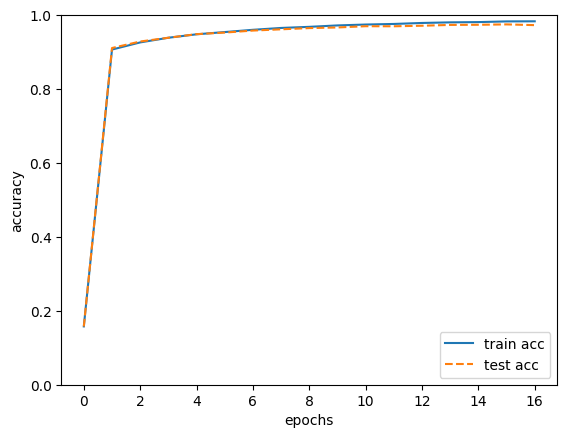

In [97]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Final Implementation

In [1]:
from mnist_data import MnistData
import numpy as np
from activations import Activations
from errors import Errors
from collections import OrderedDict
from layer import Relu,Sigmoid,Affine, SoftmaxWithLoss 
from two_layer_net_with_back_prop import TwoLayerNetWithBackProp

### Loading the Mnist Dataset

In [2]:
mnist = MnistData()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [4]:
print(x_train.shape)

(60000, 784)


### Creating the Network

In [99]:
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)

In [6]:
network

### Setting the Training Params

In [7]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 16
lr = 0.01

iter_per_ecoph = max(train_size/batch_size, 1)

In [8]:
train_losses = []
train_accs = []
test_accs = []

### Training the Model

In [9]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.10631666666666667, 0.1031
train acc, test_acc : 0.8948666666666667, 0.8999
train acc, test_acc : 0.91495, 0.9179


### Plotting the Results 

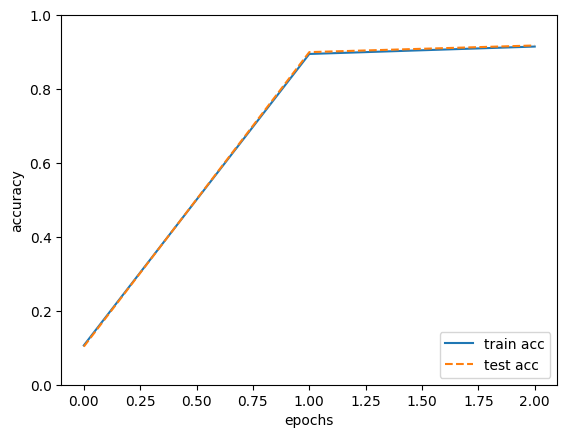

In [10]:
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### Saving the Weights

In [11]:
import numpy as np
import pickle

my_weight_pkl_file = 'Model/manoj_weights.pkl'
with open(f'{my_weight_pkl_file}', 'wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done.') 

Pickle: Model/manoj_weights.pkl is being created.
Done.


In [12]:
network.params = None
network = TwoLayerNetWithBackProp(input_size=28*28, hidden_size=100, output_size=10)
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

network.update_layers()

In [13]:
y_hat = network.predict(x_test[0:100])
print(y_hat)

[[ 8.76973007e-01 -6.73356473e+00  2.17792649e+00  4.13322141e+00
  -4.05600794e+00  3.89474644e-01 -8.16106980e+00  8.69624800e+00
  -2.62380898e-01  3.25416883e+00]
 [ 3.14042198e+00 -2.99450024e+00  8.24721328e+00  3.79522893e+00
  -7.60895887e+00  3.18085970e+00  4.70176461e+00 -8.33017212e+00
   2.70482554e+00 -6.96629054e+00]
 [-5.41742083e+00  6.43926194e+00  1.17747374e+00  7.87898571e-01
  -2.04135692e+00 -1.03580545e+00  1.27847720e-01  4.87586446e-01
   7.33862492e-01 -1.30077113e+00]
 [ 1.12348734e+01 -1.22542820e+01  3.44077167e+00  1.87492922e-01
  -7.62117783e+00  3.59070101e+00  1.94734469e+00 -5.25262041e-01
   4.10173030e-01 -4.74176183e-01]
 [-1.80738141e+00 -5.98129191e+00  9.76470822e-02 -2.61891078e+00
   6.53803147e+00 -8.49925401e-01  4.41452680e-01  4.15018755e-01
   7.61571372e-01  3.07214316e+00]
 [-7.04974157e+00  7.76698567e+00  1.05190076e+00  1.62135994e+00
  -2.35296305e+00 -2.06476548e+00 -1.85722956e+00  1.72392056e+00
   1.51774382e+00 -4.06441481e-01

### Testing the Prediction

Predicted_Digit 0


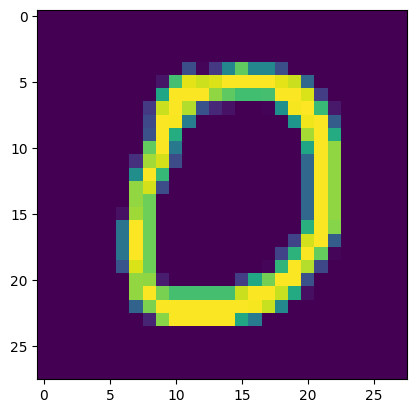

In [14]:

plt.imshow(x_test[10].reshape(28,28))
print('Predicted_Digit',np.argmax(y_hat[10]))

### Validating the Result

In [15]:
import os
import pandas as pd
import subprocess
import cv2
# Define the base directory where your images are stored
base_dir = 'Data'

# Initialize a list to store results
results = []

# Loop over each digit (0-9)
for digit in range(10):
    digit_dir = os.path.join(base_dir, str(digit))
    
    # Check if the directory exists
    if os.path.isdir(digit_dir):
        # Loop over each image in the digit directory
        for filename in os.listdir(digit_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(digit_dir, filename)
                print(image_path)
                # Run module5-3.py with the image and digit as arguments using subprocess
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                image = cv2.bitwise_not(image)
                kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
                image = cv2.filter2D(image, -1, kernel)

                # Resize and normalize
                image = cv2.resize(image, (28, 28))
                image = image.reshape(1, 28 * 28).astype(np.float32) / 255.0    
                result = np.argmax(network.predict(image))
                print(result)
                # Process the output to extract predicted digit and result status
                
                # Check if the prediction was successful or failed
                if result == int(image_path.split('\\')[-2]) :
                    status = "Success"
                    predicted_digit = digit  
                else:
                    status = "Fail"
                    # Extract predicted digit from the output message and strip any punctuation
                    predicted_digit = result

                
                # Append the result to the list
                results.append({
                    "Filename": filename,
                    "Actual Digit": digit,
                    "Predicted Digit": predicted_digit,
                    "Status": status
                })

# Convert the list of results to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

#save the DataFrame to a CSV file
df_results.to_csv("prediction_results.csv", index=False)


Data\0\0_1.jpg
0
Data\0\0_2.jpg
0
Data\0\0_3.jpg
0
Data\0\0_4.jpg
2
Data\0\0_5.jpg
0
Data\1\1_1.jpg
5
Data\1\1_2.jpg
1
Data\1\1_3.jpg
1
Data\1\1_4.jpg
1
Data\1\1_5.jpg
1
Data\2\2_1.jpg
2
Data\2\2_2.jpg
4
Data\2\2_3.jpg
5
Data\2\2_4.jpg
6
Data\2\2_5.jpg
2
Data\3\3_1.jpg
1
Data\3\3_2.jpg
7
Data\3\3_3.jpg
1
Data\3\3_4.jpg
9
Data\3\3_5.jpg
5
Data\4\4_1.jpg
1
Data\4\4_2.jpg
4
Data\4\4_3.jpg
9
Data\4\4_4.jpg
9
Data\4\4_5.jpg
1
Data\5\5_1.jpg
5
Data\5\5_2.jpg
1
Data\5\5_3.jpg
8
Data\5\5_4.jpg
5
Data\5\5_5.jpg
8
Data\6\6_1.jpg
6
Data\6\6_2.jpg
6
Data\6\6_3.jpg
6
Data\6\6_4.jpg
6
Data\6\6_5.jpg
6
Data\7\7_1.jpg
1
Data\7\7_2.jpg
7
Data\7\7_3.jpg
3
Data\7\7_4.jpg
7
Data\7\7_5.jpg
1
Data\8\8_1.jpg
5
Data\8\8_2.jpg
1
Data\8\8_3.jpg
5
Data\8\8_4.jpg
1
Data\8\8_5.jpg
0
Data\9\9_1.jpg
7
Data\9\9_2.jpg
7
Data\9\9_3.jpg
7
Data\9\9_4.jpg
7
Data\9\9_5.jpg
7
   Filename  Actual Digit  Predicted Digit   Status
0   0_1.jpg             0                0  Success
1   0_2.jpg             0                0  Su

In [16]:
df_results.Status.value_counts()

Status
Fail       30
Success    20
Name: count, dtype: int64

## Validating the results using subprocess 

In [17]:
import os
import pandas as pd
import subprocess

# Define the base directory where your images are stored
base_dir = 'Data'

# Initialize a list to store results
results = []

# Loop over each digit (0-9)
for digit in range(10):
    digit_dir = os.path.join(base_dir, str(digit))
    
    # Check if the directory exists
    if os.path.isdir(digit_dir):
        # Loop over each image in the digit directory
        for filename in os.listdir(digit_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(digit_dir, filename)
                print(image_path)
                # Run module5-3.py with the image and digit as arguments using subprocess
                result = subprocess.run(
                    ["python", "module6.py", image_path, str(digit)], 
                    capture_output=True, 
                    text=True
                )
                print(result)
                # Process the output to extract predicted digit and result status
                output = result.stdout.strip()
                print(output) 
                
                # Check if the prediction was successful or failed
                if "Success" in output:
                    status = "Success"
                    predicted_digit = digit  
                else:
                    status = "Fail"
                    # Extract predicted digit from the output message and strip any punctuation
                    predicted_digit = int(output.split()[-1].rstrip('.'))

                
                # Append the result to the list
                results.append({
                    "Filename": filename,
                    "Actual Digit": digit,
                    "Predicted Digit": predicted_digit,
                    "Status": status
                })

# Convert the list of results to a DataFrame
df_results = pd.DataFrame(results)

# Display the DataFrame
print(df_results)

#save the DataFrame to a CSV file
df_results.to_csv("prediction_results.csv", index=False)


Data\0\0_1.jpg
CompletedProcess(args=['python', 'module6.py', 'Data\\0\\0_1.jpg', '0'], returncode=0, stdout='Figure(640x480)\nSuccess: Image Data\\0\\0_1.jpg for digit 0 is recognized as 0.\n', stderr='')
Figure(640x480)
Success: Image Data\0\0_1.jpg for digit 0 is recognized as 0.
Data\0\0_2.jpg
CompletedProcess(args=['python', 'module6.py', 'Data\\0\\0_2.jpg', '0'], returncode=0, stdout='Figure(640x480)\nSuccess: Image Data\\0\\0_2.jpg for digit 0 is recognized as 0.\n', stderr='')
Figure(640x480)
Success: Image Data\0\0_2.jpg for digit 0 is recognized as 0.
Data\0\0_3.jpg
CompletedProcess(args=['python', 'module6.py', 'Data\\0\\0_3.jpg', '0'], returncode=0, stdout='Figure(640x480)\nSuccess: Image Data\\0\\0_3.jpg for digit 0 is recognized as 0.\n', stderr='')
Figure(640x480)
Success: Image Data\0\0_3.jpg for digit 0 is recognized as 0.
Data\0\0_4.jpg
CompletedProcess(args=['python', 'module6.py', 'Data\\0\\0_4.jpg', '0'], returncode=0, stdout='Figure(640x480)\nFail: Image Data\\0\\

In [19]:
print(df_results.Status.value_counts())

Status
Fail       30
Success    20
Name: count, dtype: int64
